<a href="https://colab.research.google.com/github/logicaldemon/GRIP-The_Sparks_Foundation/blob/master/Task4_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Decision Trees

This notebook deals with understanding the working of decision trees.

In [9]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])
print('Dataset'.center(80))
print(df.head(5))

                                    Dataset                                     
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
0                5.1               3.5  ...               0.2      0.0
1                4.9               3.0  ...               0.2      0.0
2                4.7               3.2  ...               0.2      0.0
3                4.6               3.1  ...               0.2      0.0
4                5.0               3.6  ...               0.2      0.0

[5 rows x 5 columns]


In [27]:
#let's check some info on type of data in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [28]:
print("Name of target :",iris.target_names)

Name of target : ['setosa' 'versicolor' 'virginica']


#Visualising Iris dataset

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


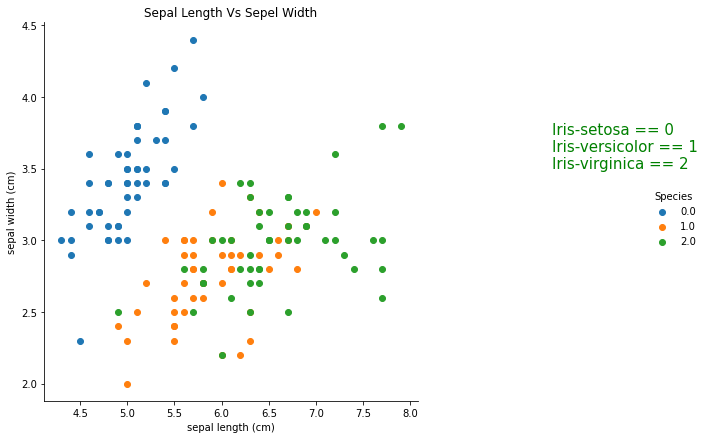

In [81]:
# By selecting two features SepalLengthCm and SepelWidthCm
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()
plt.title('Sepal Length Vs Sepel Width')
plt.text(9.5,3.5,'Iris-setosa == 0 \nIris-versicolor == 1\nIris-virginica == 2',fontsize=15, color='g')
plt.show()
# Iris-setosa == 0
# Iris-versicolor == 1
# Iris-virginica == 2


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


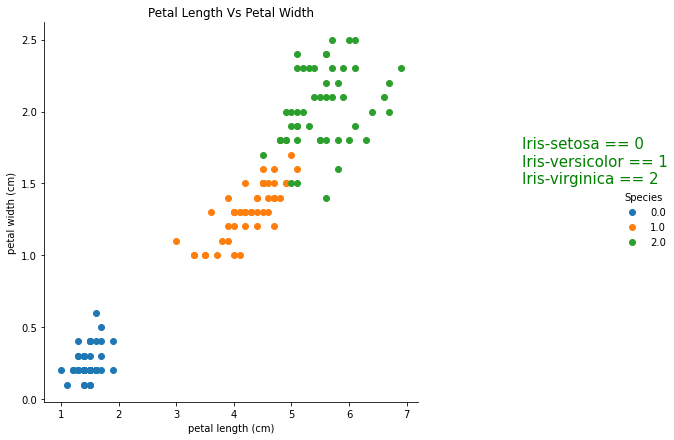

In [70]:
# By selecting two features PetalLengthCm and PetalWidthCm
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "petal length (cm)", "petal width (cm)") \
   .add_legend()
plt.title('Petal Length Vs Petal Width')
plt.text(9,1.5,'Iris-setosa == 0 \nIris-versicolor == 1\nIris-virginica == 2',fontsize=15, color='g')
plt.show()
# Iris-setosa == 0
# Iris-versicolor == 1
# Iris-virginica == 2

#Pair Plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


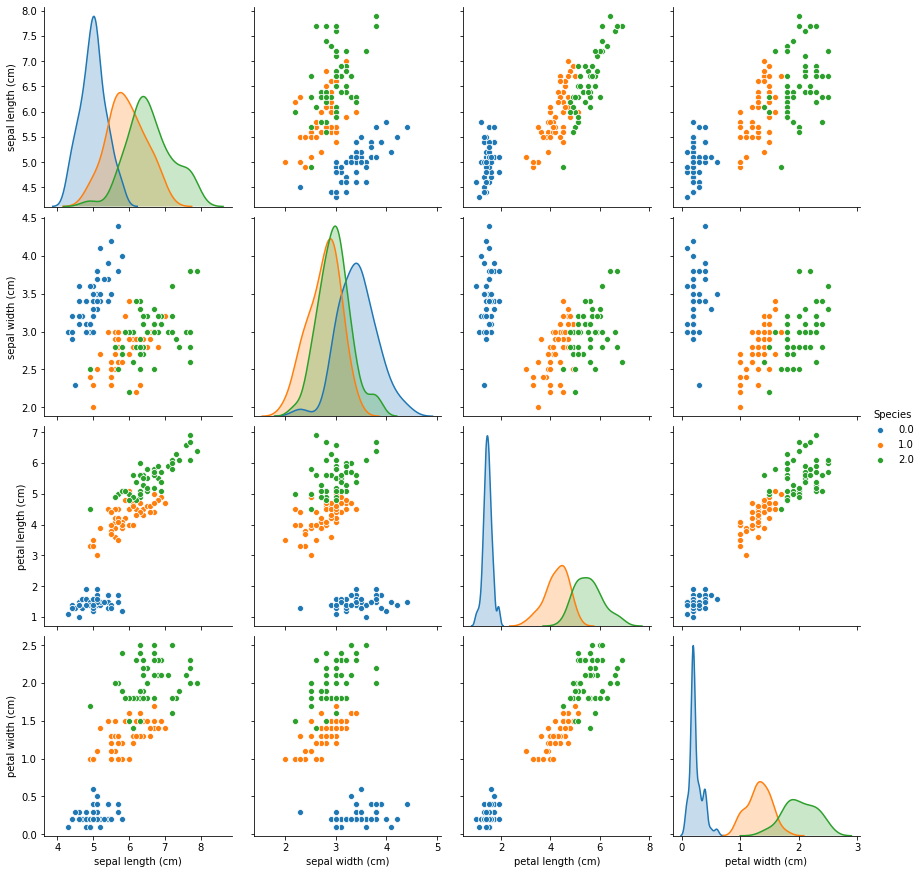

In [82]:
sns.pairplot(df, hue="Species", size=3);
plt.show()

#Training

In [100]:
df = df.drop(['Species'], axis =1)
y = iris['target']

In [102]:
print('Shape of dataset(without target variable): ',df.shape)
print('Shape of target variable: ',y.shape)

Shape of dataset(without target variable):  (150, 4)
Shape of target variable:  (150,)


### Now let us define the Decision Tree Algorithm

In [103]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Let us visualize the Decision Tree to understand it better.



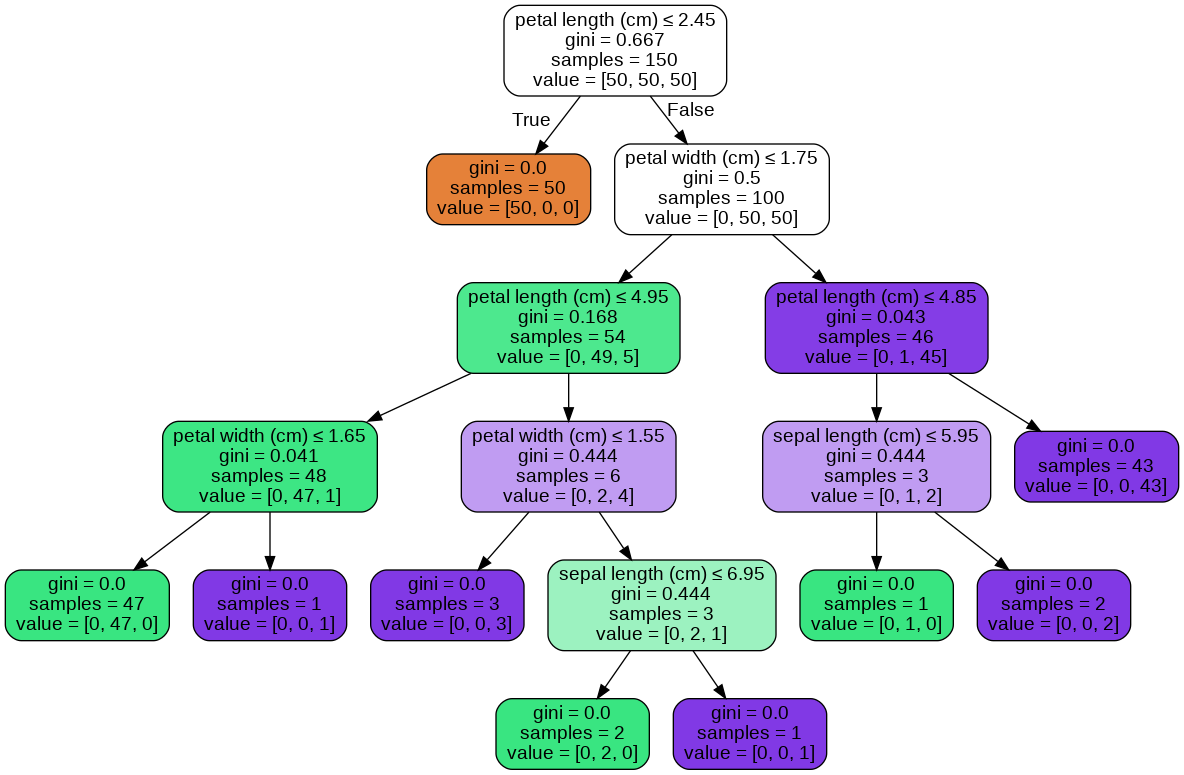

In [105]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**